In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

### Short intro
- The *SciPy* **framework** builds on top of the *low-level NumPy* for multidimensional arrays,
- and provides a large number of *higher-level* **scientific algorithms**.

### Some of the topics that *SciPy* covers are:
- Special functions (```scipy.special```)
- Integration (```scipy.integrate```)
- Optimization (```scipy.optimize```)
- Interpolation (```scipy.interpolate```)
- Fourier Transforms (```scipy.fftpack```)
- Signal Processing (```scipy.signal```)
- Linear Algebra (```scipy.linalg```)
- Sparse Eigenvalue Problems (```scipy.sparse```)
- Statistics (```scipy.stats```)
- Multi-dimensional image processing (```scipy.ndimage```)
- File IO (```scipy.io```)

In [3]:
# Different kinds of import 
#   fetch all        --  from scipy import *     -- for REAL??
#   part of          --  from scipy.linag as la  --  hmm, reasonable 
#   part of part of  --  from scipy.special import jn, yn 

In [14]:
from scipy import *  # use this can reduce a lot of work (for me)

### Special Functions 
- *I have no idea what the* ```special functions``` *mean*.
- Here's a wiki [link](https://zh.wikipedia.org/wiki/%E8%B4%9D%E5%A1%9E%E5%B0%94%E5%87%BD%E6%95%B0)

In [10]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [12]:
n = 0
x = 0.0 

print(
    "J_{:d}({:f}) = {:f}".format(n, x, jn(n, x))
)

x = 1.0 

print(
    "J_{:d}({:f}) = {:f}".format(n, x, jn(n, x))
)

J_0(0.000000) = 1.000000
J_0(1.000000) = 0.765198


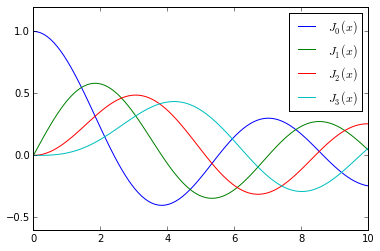

In [17]:
x = linspace(0, 10, 100)

fig, ax = plt.subplots()

for n in range(4):
    ax.plot(x, jn(n, x), label=f"$J_{n}(x)$")
    
ax.legend()

In [19]:
n = 0
m = 4 

jn_zeros(n, m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

### Integration
> It was called (numerical) ***quadrature*** as well.

In [23]:
from scipy.integrate import quad, dblquad, tplquad

- 0x01 - basic usage

In [32]:
def f(x):
    return x 

x_lower = 0 
x_upper = 1 


val, abs_err = quad(f, x_lower, x_upper)

val
abs_err

0.5

5.551115123125783e-15

- 0x02 - wtf usage

In [34]:
def integrand(x, n):
    """
    Bessel function of first kind and order n.
    """
    return jn(n, x)  # :(

x_lower = 0
x_upper = 1 


val, abs_err = quad(integrand, x_lower, x_upper, args=(3,))

val
abs_err

0.004995343578232489

5.545945456467126e-17

- 0x03 - simple func

In [38]:
val, abs_err = quad(lambda x: exp(-x ** 2), -Inf, Inf)  # use 'Inf' as integral limits (is fine)

val
abs_err 

# what's this for??
analytical = sqrt(pi)
analytical

1.7724538509055159

1.4202636780944923e-08

1.7724538509055159

- 0x04 - higher-dimen integration 

In [39]:
def integrand(x, y):
    return exp(-x**2 - y**2)

x_lower, x_upper = (0, 10)
y_lower, y_upper = (0, 10)

val, abs_err = dblquad(
    integrand, 
    x_lower,
    x_upper,
    lambda x: y_lower, 
    lambda x: y_upper,
)


val
abs_err

0.7853981633974476

1.3753098510218528e-08

### Ordinary differential equations